## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
import pandas as pd
import numpy as np

In [ ]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
#devo utilizzare questa sintassi perché lavoro su windows:
!curl -LO https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt  --output data_000637.txt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [5]:
df = pd.read_csv('data_000637.txt')
display(df)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [6]:
x=((df["BX_COUNTER"]).max())+1
print("In an ORBIT we have",x,"BX")
df['TOT_NS'] = pd.Series(df["ORBIT_CNT"]*3564*30+df["BX_COUNTER"]*30+df["TDC_MEAS"], index=df.index)
tot_time = df["TOT_NS"].max() - df["TOT_NS"].min()
print("The data taking lasted",tot_time,"ns")

df["HEAD"]=pd.Series(np.random.randint(2,size=len(df.index)), index=df.index)
display(df)

In an ORBIT we have 3564 BX
The data taking lasted 1176499504 ns


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TOT_NS
0,0,0,123,3869200167,2374,26,413694881926886
1,0,0,124,3869200167,2374,27,413694881926887
2,1,0,63,3869200167,2553,28,413694881932258
3,0,0,64,3869200167,2558,19,413694881932399
4,0,0,64,3869200167,2760,25,413694881938465
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,413696058426194
1310716,1,1,4,3869211171,763,11,413696058426221
1310717,1,0,64,3869211171,764,0,413696058426240
1310718,1,0,139,3869211171,769,0,413696058426390


In [7]:
df2=(df[df["HEAD"]==1])
display(df2)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TOT_NS
2,1,0,63,3869200167,2553,28,413694881932258
6,1,0,61,3869200167,2772,14,413694881938814
7,1,0,139,3869200167,2776,0,413694881938920
8,1,0,62,3869200167,2774,21,413694881938881
15,1,1,139,3869200167,2797,0,413694881939550
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,413696058426194
1310716,1,1,4,3869211171,763,11,413696058426221
1310717,1,0,64,3869211171,764,0,413696058426240
1310718,1,0,139,3869211171,769,0,413696058426390


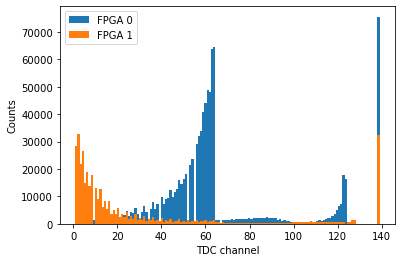

In [13]:
df3=(df[df["FPGA"]==0])
df4=(df[df["FPGA"]==1])

import matplotlib.pyplot as plt
plt.hist(df3["TDC_CHANNEL"], bins=df3["TDC_CHANNEL"].max())
plt.hist(df4["TDC_CHANNEL"], bins=df4["TDC_CHANNEL"].max())
plt.xlabel("TDC channel")
plt.ylabel("Counts")
plt.legend(("FPGA 0", "FPGA 1"))

In [12]:
gdf=df.groupby(['TDC_CHANNEL']).count()
a=gdf.idxmax()[0]
gdf=gdf.drop(a)
b=gdf.idxmax()[0]
gdf=gdf.drop(b)
c=gdf.idxmax()[0]
print("The noisiest channels are", a, ",", b, ",",c)

gdf3=df3.groupby(['TDC_CHANNEL']).count()
a=gdf3.idxmax()[0]
gdf3=gdf3.drop(a)
b=gdf3.idxmax()[0]
gdf3=gdf3.drop(b)
c=gdf3.idxmax()[0]
print("FPGA 0: the noisiest channels are", a, ",", b, ",",c)

gdf4=df4.groupby(['TDC_CHANNEL']).count()
a=gdf4.idxmax()[0]
gdf4=gdf4.drop(a)
b=gdf4.idxmax()[0]
gdf4=gdf4.drop(b)
c=gdf4.idxmax()[0]
print("FPGA 1: the noisiest channels are", a, ",", b, ",",c)

print("The number of unique orbits is",len(pd.unique(df['ORBIT_CNT'])))
df5=(df[df["TDC_CHANNEL"]==139])
print("The number of unique orbits with at least one measurement from TDC_CHANNEL=139\n is",len(pd.unique(df5['ORBIT_CNT']))) 

The noisiest channels are 139 , 64 , 63
FPGA 0: the noisiest channels are 139 , 64 , 63
FPGA 1: the noisiest channels are 2 , 139 , 1
The number of unique orbits is 11001
The number of unique orbits with at least one measurement from TDC_CHANNEL=139
 is 10976
